In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_table('data/CDNOW.txt',header=None,sep='\s+',names=['id','date','amount','price'])#\s+匹配空白符

In [3]:
plt.rc('figure',figsize=(8,8))
from matplotlib.font_manager import *
myfont = FontProperties(fname='C:\Windows\Fonts/simhei.ttf')

In [4]:
data.head()

,id,date,amount,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
data.describe()

,id,date,amount,price
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id        69659 non-null int64
date      69659 non-null int64
amount    69659 non-null int64
price     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [127]:
data['month'] = data.date.astype('datetime64[M]')

In [128]:
data.head()

,id,date,amount,price,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


## 各订单购买数量分析

In [7]:
data_amount=data['amount'].value_counts()

In [8]:
data_amount

1     31454
2     16070
3      9444
4      5015
5      2792
6      1627
7      1057
8       684
9       403
10      293
11      180
12      136
13      108
14       70
15       59
18       48
16       39
17       34
19       26
20       22
22       15
21       12
25        9
23        8
24        8
26        7
27        6
32        3
39        3
38        3
37        3
30        3
28        3
56        2
29        2
40        2
47        1
43        1
41        1
42        1
99        1
70        1
36        1
34        1
63        1
Name: amount, dtype: int64

In [9]:
data['amount'].max()

99

Text(0, 0.5, '单笔购买数量')

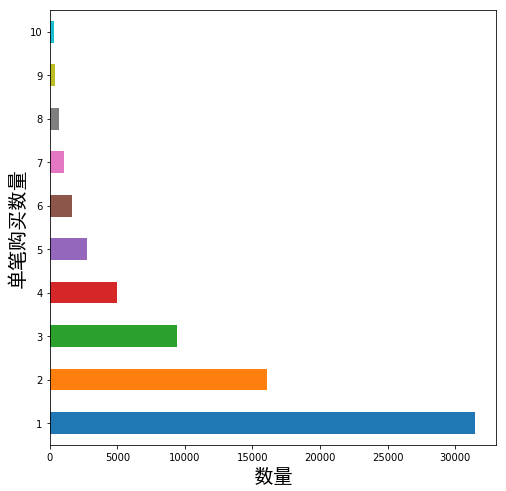

In [10]:
data_amount[:10].plot.barh()#绝大多数客户小数量购买商品
plt.xlabel('数量',fontproperties=myfont,size=20)
plt.ylabel('单笔购买数量',fontproperties=myfont,size=20)

## 各订单购买金额分析

In [11]:
data_price=pd.cut(data['price'],bins=[5,10,15,20,25,50,100,200,400,1000])

In [12]:
data_price.value_counts()

(25, 50]       22143
(10, 15]       17468
(50, 100]      10869
(15, 20]        7024
(20, 25]        5192
(5, 10]         3325
(100, 200]      2689
(200, 400]       421
(400, 1000]       39
Name: price, dtype: int64

Text(0, 0.5, '单笔购买金额区间')

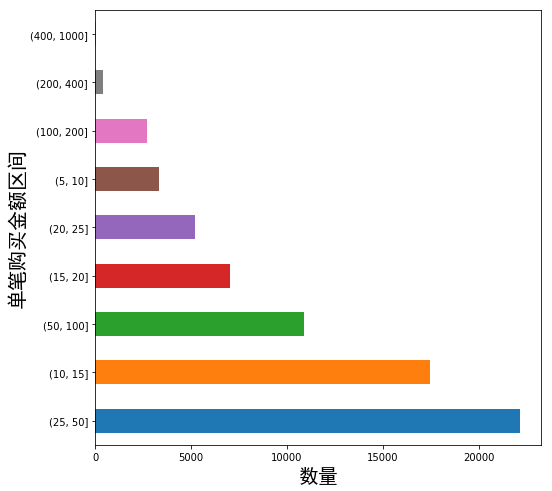

In [13]:
data_price.value_counts().plot.barh()
plt.xlabel('数量',fontproperties=myfont,size=20)
plt.ylabel('单笔购买金额区间',fontproperties=myfont,size=20)

## 趋势分析

In [14]:
data['date']=pd.to_datetime(data['date'],format='%Y%m%d')

In [15]:
data.head()

,id,date,amount,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


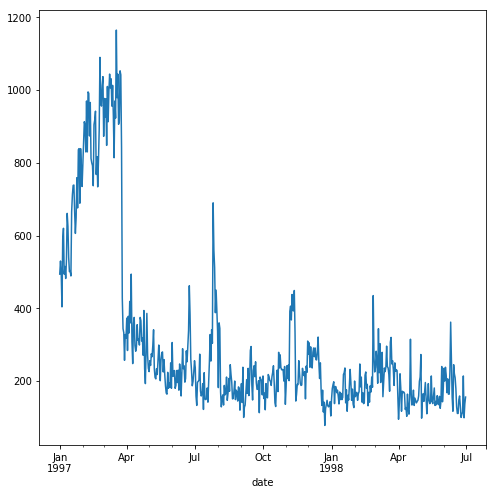

In [16]:
data.groupby('date').amount.sum().plot()#订单数量趋势

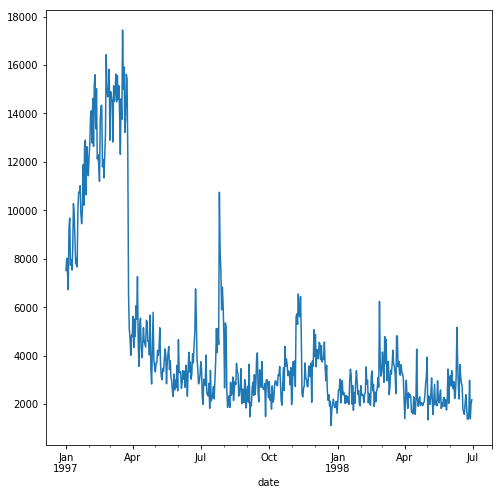

In [17]:
data.groupby('date').price.sum().plot()#订单金额趋势

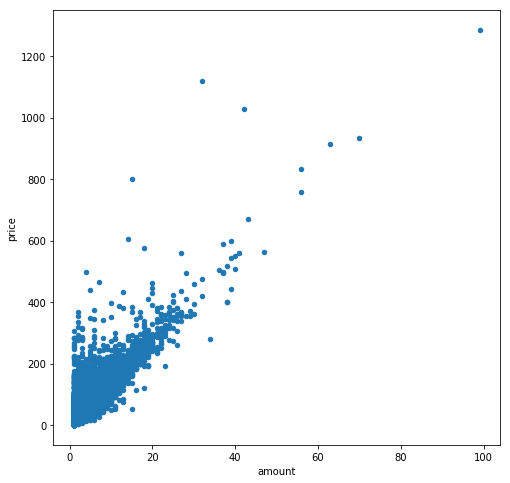

In [18]:
data.plot.scatter(x='amount',y='price')#作散点图。发现离群点不明显

## 用户消费行为静态分析

In [19]:
user=data.groupby('id').sum()

### 各用户累积购买数量分析

In [20]:
user['amount'].sort_values(ascending=False)

id
14048    1033
7592      917
7983      536
7931      514
19339     378
22279     330
499       328
6569      322
3049      301
16517     299
13167     292
22061     267
12367     263
2664      251
20917     222
21950     204
22348     195
2908      188
586       187
21739     183
16175     182
15162     182
313       174
19597     174
3901      174
22492     169
17337     164
21694     163
8250      161
1077      159
         ... 
8194        1
19065       1
8188        1
8185        1
8202        1
8182        1
19072       1
8179        1
8178        1
8176        1
19074       1
8201        1
19062       1
8245        1
19042       1
8243        1
19031       1
8235        1
8231        1
8229        1
19039       1
8225        1
19061       1
19045       1
8217        1
8209        1
19057       1
19059       1
8205        1
1           1
Name: amount, Length: 23570, dtype: int64

### 各用户累积购买贡献

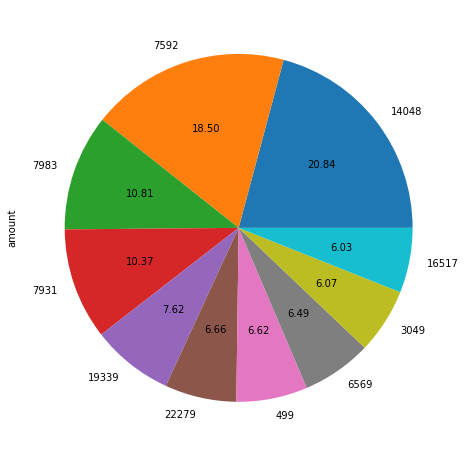

In [21]:
user['amount'].sort_values(ascending=False)[:10].plot.pie(autopct='%.2f')#取购买数量最大的前十

In [31]:
buy=pd.DataFrame({'id':user['amount'].sort_values(ascending=False).index,
                  'rate':user['amount'].sort_values(ascending=False).values/user['amount'].sum()})

In [32]:
buy#各用户购买数量贡献率

,id,rate
0,14048,0.006153
1,7592,0.005462
2,7983,0.003193
3,7931,0.003062
4,19339,0.002252
5,22279,0.001966
6,499,0.001954
7,6569,0.001918
8,3049,0.001793
9,16517,0.001781


### 各用户最大单笔购买数量分析

In [35]:
data.groupby('id').amount.max().sort_values(ascending=False)

id
8830     99
23474    70
22279    63
8529     56
7592     47
10550    43
14894    42
1412     41
15003    40
15238    39
3537     39
4766     38
8187     38
9651     37
10197    37
18769    37
18847    32
17337    32
4410     32
2275     30
4388     30
313      30
9210     29
16175    29
9172     28
2930     27
9362     27
9644     27
1909     27
20       27
         ..
6782      1
6781      1
19835     1
6779      1
16987     1
19836     1
12362     1
6775      1
6774      1
6773      1
19829     1
6794      1
17000     1
6797      1
6815      1
19812     1
12341     1
12342     1
19814     1
16997     1
12345     1
6807      1
16996     1
16995     1
6802      1
6801      1
12350     1
12351     1
19825     1
1         1
Name: amount, Length: 23570, dtype: int64

### 各用户累积购买金额

In [38]:
user.price.sort_values(ascending=False)

id
7592     13990.93
14048     8976.33
7983      6973.07
19339     6552.70
7931      6497.18
6569      4968.00
22279     4490.64
499       4378.55
3049      4262.85
15162     4234.45
16517     4185.10
2664      4100.27
22061     3948.90
13167     3898.70
12367     3798.24
14894     3363.93
1077      3324.49
21739     3319.83
20917     3077.45
21950     2982.80
2908      2914.87
586       2849.64
17337     2599.62
12098     2594.33
8250      2582.74
710       2502.30
313       2432.29
16175     2417.54
3901      2411.53
22492     2388.72
           ...   
18861        0.00
1753         0.00
11940        0.00
11955        0.00
5301         0.00
5567         0.00
16132        0.00
12366        0.00
19189        0.00
13434        0.00
9710         0.00
908          0.00
6920         0.00
9835         0.00
9853         0.00
1987         0.00
2556         0.00
455          0.00
23157        0.00
19384        0.00
6395         0.00
4384         0.00
10664        0.00
21690        0.00
19314  

### 各用户累积购买金额贡献率

In [44]:
buy_=pd.DataFrame({'rate':user['price'].sort_values(ascending=False).values/user['price'].sum()},
                  index=user['price'].sort_values(ascending=False).index)

In [45]:
buy_

,rate
id,
7592,0.005596
14048,0.003590
7983,0.002789
19339,0.002621
7931,0.002599
6569,0.001987
22279,0.001796
499,0.001751
3049,0.001705


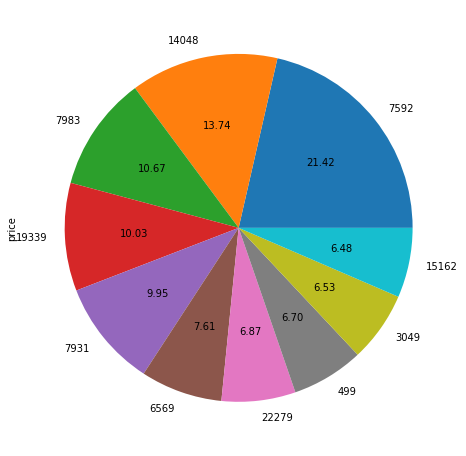

In [49]:
user['price'].sort_values(ascending=False)[:10].plot.pie(autopct='%.2f')#取购买金额最大的前十

### 最大单笔购买金额

In [22]:
data.groupby('id').price.max().sort_values(ascending=False)

id
8830     1286.01
18847    1119.68
14894    1028.51
23474     932.23
22279     915.10
8529      756.47
10550     669.93
12304     606.55
3537      597.61
10197     587.63
1903      575.92
7592      563.59
1412      558.09
15238     544.83
15003     506.97
9355      498.48
18769     497.29
17337     495.39
9651      493.91
15162     463.93
8250      460.85
313       457.49
10603     440.45
9362      436.91
6950      432.76
22815     428.30
15953     421.73
4410      421.30
21396     410.54
9172      409.22
          ...   
455         0.00
16132       0.00
13434       0.00
1225        0.00
19314       0.00
22950       0.00
2129        0.00
1381        0.00
15258       0.00
1186        0.00
22173       0.00
15452       0.00
19189       0.00
11270       0.00
11940       0.00
11955       0.00
925         0.00
13408       0.00
908         0.00
16921       0.00
5196        0.00
19384       0.00
10798       0.00
3134        0.00
20252       0.00
5301        0.00
21391       0.00
10664      

### 购买次数

In [52]:
data['id'].value_counts()

14048    217
7592     201
7983     149
22061    143
3049     117
499      110
19597    109
7145     102
2484      80
10079     67
4459      65
7931      62
710       61
12367     60
17104     58
19339     56
6057      55
8035      52
1722      52
13167     50
1077      49
20917     49
20873     49
22013     48
12476     47
1760      47
15562     46
398       44
6569      42
12860     42
        ... 
3414       1
17510      1
13416      1
11602      1
13649      1
1006       1
7636       1
5589       1
3606       1
17318      1
5717       1
7764       1
9130       1
13905      1
2991       1
17951      1
22045      1
1559       1
5653       1
7149       1
7700       1
23525      1
17382      1
13841      1
19431      1
11243      1
19934      1
5100       1
1495       1
2049       1
Name: id, Length: 23570, dtype: int64

Text(0, 0.5, '用户ID')

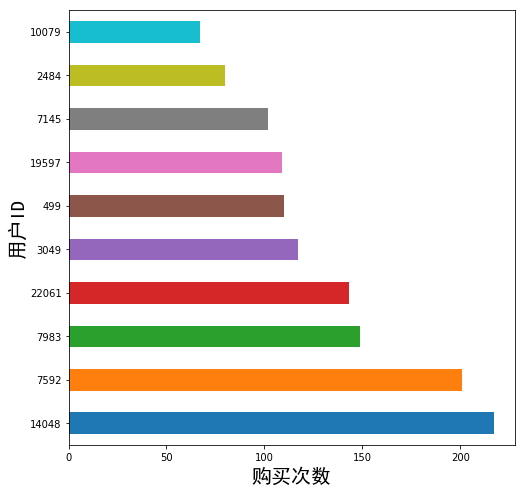

In [57]:
data['id'].value_counts()[:10].plot.barh()
plt.xlabel('购买次数',fontproperties=myfont,size=20)
plt.ylabel('用户ID',fontproperties=myfont,size=20)

## 用户消费行为动态分析

### 各用户第一次购买时间与最后一次购买时间与间隔时间

In [97]:
user_id=data['id'].unique()

In [77]:
user1=data.groupby(['id'])

In [115]:
user2=pd.DataFrame(columns=['id','time1','time2','time_dif'])

In [117]:
user2.id=user_id

In [118]:
for i in range(len(user_id)):
    user2.loc[i,'time1']=user1.get_group(i+1).reset_index().iloc[0,2]
    user2.loc[i,'time2']=user1.get_group(i+1).reset_index().iloc[-1,2]

In [113]:
user2.loc[2,'time2']-user2.loc[2,'time1']

Timedelta('511 days 00:00:00')

In [122]:
for i in range(len(user_id)):
    user2.loc[i,'time_dif']=user2.loc[i,'time2']-user2.loc[i,'time1']

In [123]:
user2.head()

,id,time1,time2,time_dif
0,1,1997-01-01 00:00:00,1997-01-01 00:00:00,0 days 00:00:00
1,2,1997-01-12 00:00:00,1997-01-12 00:00:00,0 days 00:00:00
2,3,1997-01-02 00:00:00,1998-05-28 00:00:00,511 days 00:00:00
3,4,1997-01-01 00:00:00,1997-12-12 00:00:00,345 days 00:00:00
4,5,1997-01-01 00:00:00,1998-01-03 00:00:00,367 days 00:00:00


### 分析复购率、回购率

In [131]:
#复购率指在某时间窗口内消费两次及以上用户所占的比例

pivoted_counts = data.pivot_table(index = 'id', columns = 'month',
                               values = 'date', aggfunc = 'count').fillna(0)
columns_month = data.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()


,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [133]:
#一个月内有重复购买的标1，只购买一次的标0，没购买记录的标NAN
pivoted_counts_trans = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_trans.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


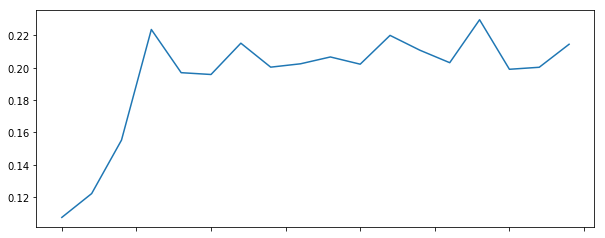

In [135]:
(pivoted_counts_trans.sum()/pivoted_counts_trans.count()).plot(figsize = (10,4))

#sum()表示这个月内复购的人数
#count()会计入0的数量，表示这个月总的购买人数

In [140]:
#回购率指在某一个月内消费，在下一个月仍然消费的顾客占比
pivoted_amount = data.pivot_table(index = 'id', columns = 'month',
                               values = 'price', aggfunc = 'mean').fillna(0)
columns_month = data.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [145]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()#该月有消费记录为1

18

In [150]:
def transfrom(data):
    flag=[]
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:
                flag.append(1)
            if data[i+1]==0:
                flag.append(0)
        else:
            flag.append(np.NAN)
    flag.append(np.NAN)
    return flag

In [151]:
pivoted_purchase_return = pivoted_purchase.apply(transfrom, axis = 1)

columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)

pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


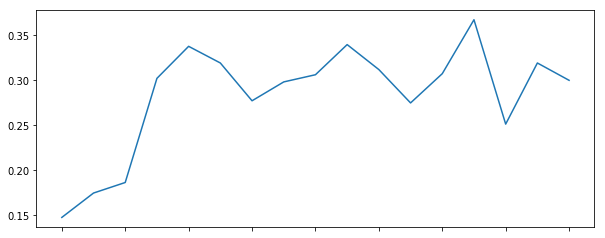

In [152]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

### 用户生命周期

In [156]:
#最后一次消费与第一次消费时间差
user2['time_dif'].sort_values(ascending=False)

327     544 days
397     544 days
445     543 days
95      542 days
891     542 days
228     542 days
690     541 days
163     540 days
1721    539 days
804     539 days
1555    539 days
796     539 days
1592    539 days
709     538 days
63      538 days
1175    538 days
1793    537 days
94      537 days
1082    537 days
567     537 days
1500    537 days
789     537 days
1091    536 days
1832    536 days
322     536 days
1579    536 days
1964    536 days
2298    536 days
1395    536 days
1908    535 days
          ...   
15883     0 days
8024      0 days
8023      0 days
8022      0 days
15886     0 days
15888     0 days
8041      0 days
8042      0 days
15854     0 days
8044      0 days
8063      0 days
15835     0 days
8061      0 days
8060      0 days
8059      0 days
8058      0 days
8057      0 days
15836     0 days
15838     0 days
15840     0 days
15843     0 days
15845     0 days
8051      0 days
15847     0 days
8049      0 days
15848     0 days
8047      0 days
8046      0 da

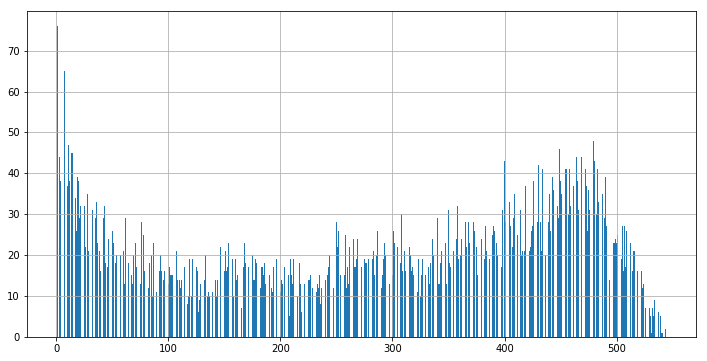

In [169]:
user2['time_dif'] = user2['time_dif']/np.timedelta64(1,'D')
user2[user2.time_dif>0].time_dif.hist(bins = 1000, figsize = (12,6))
#滤除只购买一次的用户，不算入生命周期的范围。

In [163]:
user2[user2.time_dif>0].time_dif.mean()

276.0448072247308